In [3]:
klassemidden<-matrix(c(10,30,50,70,90,125,175))
huur<-matrix(c(76,108,128,54,18,4,1))
koop<-matrix(c(4,12,32,36,42,36,19))

In [7]:
df = data.frame(klassemidden, huur, koop)
df['n'] = df['huur'] + df['koop']
df['p_huur'] = df['huur'] / df['n']
df['p_koop'] = 1 - df['p_huur']
df['ln_odds'] = log(df['p_koop'])
df

klassemidden,huur,koop,n,p_huur,p_koop,ln_odds
10,76,4,80,0.95,0.05,-2.99573227
30,108,12,120,0.90,0.10,-2.30258509
50,128,32,160,0.80,0.20,-1.60943791
70,54,36,90,0.60,0.40,-0.91629073
90,18,42,60,0.30,0.70,-0.35667494
125,4,36,40,0.10,0.90,-0.10536052
175,1,19,20,0.05,0.95,-0.05129329


In [19]:
A = cbind(klassemidden, 1)
b = cbind(df['ln_odds'])
A; b;

10,1
30,1
50,1
70,1
90,1
125,1
175,1


ln_odds
-2.99573227
-2.30258509
-1.60943791
-0.91629073
-0.35667494
-0.10536052
-0.05129329


In [31]:
x = solve(t(A) %*% A) %*% t(A) %*% as.vector(unlist(b))
x

0.0182837
-2.6276302


Het startgetal is $-2.627$ en de richtingscoefficient is $0.0182$.

In [33]:
X = klassemidden
Y = as.vector(unlist(df['ln_odds']))

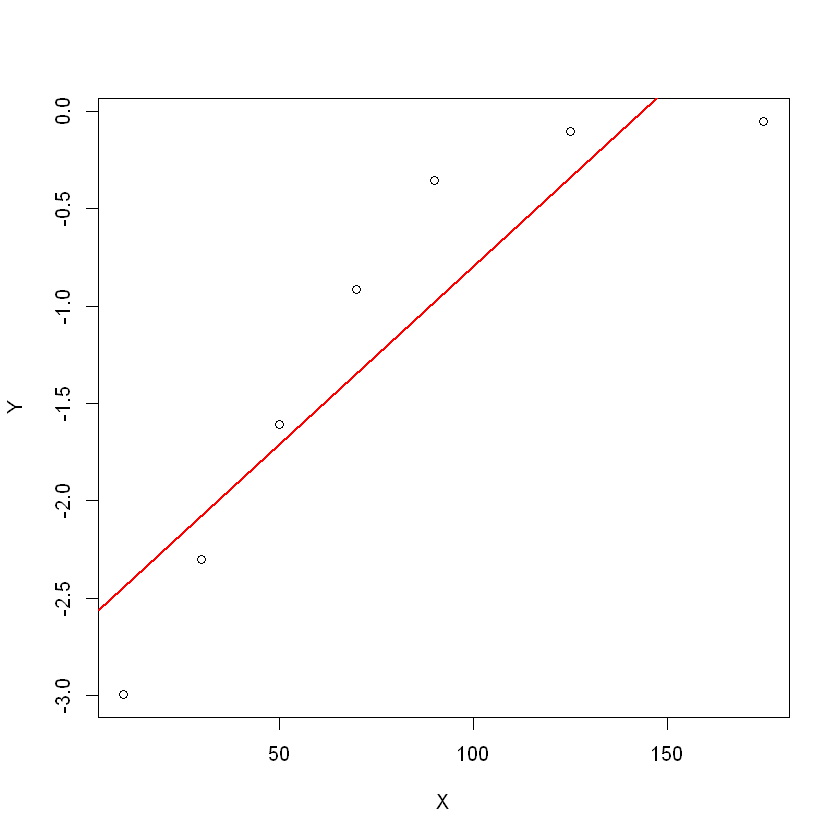

In [41]:
plot(X,Y)
abline(glm(Y~X), col='red', lw=2)

In [66]:
klassemidden = c(14, 35, 57, 77, 96, 134, 183)
huur = c(13, 15, 38, 42, 49,39, 25)
koop = c(84,115,132,61,24,13,8)
totaal = huur + koop
odds_huur = huur / totaal
odds_koop = koop / totaal
odds = odds_koop / odds_huur
ln_odds = log(odds)
Y = ln_odds
X = klassemidden

A = cbind(X, 1)
solve(t(A) %*% A) %*% t(A) %*% Y

X,-0.02173485
,2.21761839


In [67]:
glm(Y~X)


Call:  glm(formula = Y ~ X)

Coefficients:
(Intercept)            X  
    2.21762     -0.02173  

Degrees of Freedom: 6 Total (i.e. Null);  5 Residual
Null Deviance:	    11.39 
Residual Deviance: 1.701 	AIC: 15.96

In [68]:
abs(cor(X,Y))

[1] 0.9223467